# Pymaceuticals Inc.
---

### Analysis

- There is a positive correlation between weight of mouse and the average tumor volume for the group that took Capomulin.
- Ramicane and Capomulin group showed the best results in decreasing the size of the tumor.
- Ketapril seems to be the least effective treatment group
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# print(mouse_metadata.head())
# study_results.head()

# Combine the data into a single DataFrame
merged = pd.merge(study_results,mouse_metadata, on=['Mouse ID'])

# Display the data table for preview
merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(merged['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#len([merged.duplicated() == True])
duplicated_ID = merged[merged.duplicated() == True]['Mouse ID']
duplicated_ID
# duplication = merged.duplicated(keep=False)
# duplication_row = merged[duplication]
# duplication_row

861    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged[merged['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# no_dupes_merged = merged.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='last')
# no_dupes_merged
no_dupes_merged = merged.drop(merged[merged['Mouse ID'] == 'g989'].index)
no_dupes_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
len(no_dupes_merged['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean = no_dupes_merged.groupby(['Drug Regimen']).mean(['Tumor Volume (mm3)'])
mean_vol = mean['Tumor Volume (mm3)']

median = no_dupes_merged.groupby(['Drug Regimen']).median(['Tumor Volume (mm3)'])
median_vol = median['Tumor Volume (mm3)']


abc = no_dupes_merged[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen'])
var_vol = abc.var()['Tumor Volume (mm3)']

stdev_vol = abc.std()['Tumor Volume (mm3)']

sem_vol = abc.sem()['Tumor Volume (mm3)']

#variance and stdev doesn't seem to work unless grouping a two-columned list, but mean and median works if you group just by Drug Regimen

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame ({
    'mean':mean_vol,
    'median':median_vol,
    'var':var_vol,
    'stdev':stdev_vol,
    'sem':sem_vol
    
    
    
},index = None)
summary

,mean,median,var,stdev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
abc = no_dupes_merged[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen'])

aggregate = abc.aggregate(['mean','median','var','std','sem'])
aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

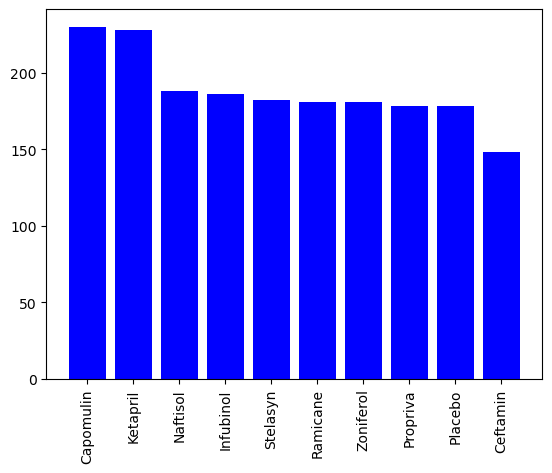

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
x_axis = no_dupes_merged['Drug Regimen'].unique()
y_axis = no_dupes_merged.groupby('Drug Regimen').count()['Timepoint'].sort_values(ascending = False)

plt.bar(x_axis, y_axis, color='blue', align ='center')
plt.xticks(rotation = 90)
plt.show()

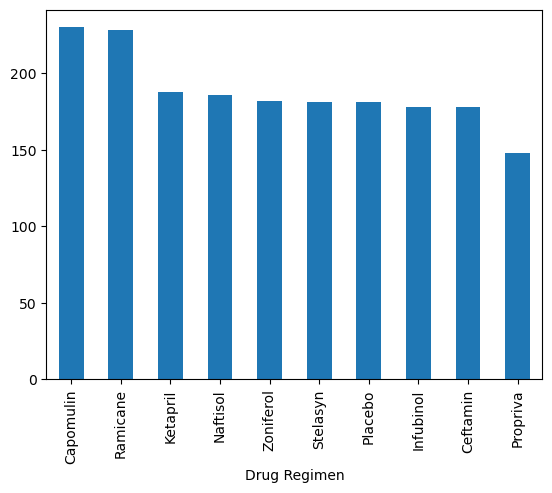

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_rows = no_dupes_merged['Drug Regimen'].value_counts()
bar_plot = count_rows.plot(kind='bar')
plt.show()

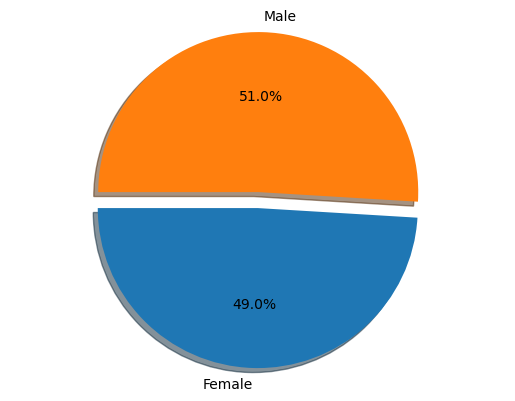

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
x_value = no_dupes_merged['Sex'].unique()
y_value = no_dupes_merged.groupby('Sex').count()['Mouse ID']

plt.pie(y_value, explode = (0.1,0), labels = x_value, autopct="%1.1f%%", shadow=True, startangle = 180)
plt.axis('equal')
plt.show()

# print(x_value)
# print(y_value)

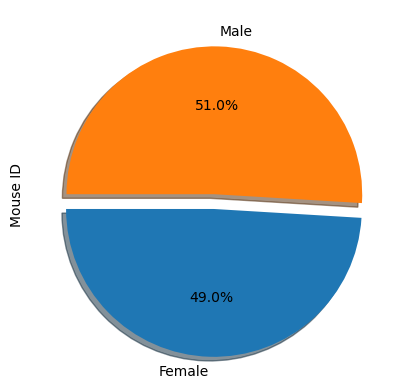

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y_value.plot(kind='pie',explode = (0.1,0), autopct = "%1.1f%%", shadow = True, startangle = 180)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# max_timepoint = no_dupes_merged.groupby('Drug Regimen')[['Timepoint','Tumor Volume (mm3)']].max()
# print(max_timepoint)


# max_timepoint_indices = no_dupes_merged.groupby('Drug Regimen')['Timepoint'].idxmax()
# tumor_volumes_at_max_timepoint = no_dupes_merged.loc[max_timepoint_indices,['Drug Regimen','Tumor Volume (mm3)']]
# final_tumor_vol = tumor_volumes_at_max_timepoint.to_string(index=False, header=True, columns=['Drug Regimen', 'Tumor Volume (mm3)'])
# print(final_tumor_vol)

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = no_dupes_merged.groupby('Mouse ID')['Timepoint'].max().reset_index()

# maximum_248 = no_dupes_merged.groupby('Mouse ID')[['Tumor Volume (mm3)','Timepoint']].max()['Timepoint']
# print(maximum_248)
# print(no_dupes_merged)

# max_time_mouse = no_dupes_merged[no_dupes_merged['Timepoint'] == 45]
# max_df = max_time_mouse[['Drug Regimen','Tumor Volume (mm3)']].reset_index(drop=True)
# print(max_df['Drug Regimen'].unique())
# print(max_df)
# max_max = max_df.groupby('Drug Regimen').max()['Tumor Volume (mm3)']
# max_max
# print(max_max)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
maximum_timepoint_merged = pd.merge(max_timepoint_df, no_dupes_merged, on=['Mouse ID', 'Timepoint'], how='left')
maximum_timepoint_merged
maximum_timepoint_merged['Drug Regimen']
# maximum_timepoint_merged_final = maximum_timepoint_merged[['Mouse ID','Drug Regime','Tumor Volume (mm3)', 'Timepoint']]


# last_tumor_merged = pd.merge(summary, max_max, how = 'left', left_on = 'Drug Regimen', right_on = 'Drug Regimen')
# last_tumor_merged


# last_tumor_merged = pd.merge(summary, final_tumor_vol, how = 'left', left_on = 'Drug Regimen', right_on = 'Drug Regimen')
# last_tumor_merged

# print(last_tumor_merged)


# max1_tumor_volumes = no_dupes_merged.groupby('Mouse ID').max()
# max1_tumor_volumes["Drug Regimen"].unique()

0      Infubinol
1      Infubinol
2        Placebo
3       Ceftamin
4       Stelasyn
         ...    
243     Propriva
244     Ramicane
245    Infubinol
246     Naftisol
247     Naftisol
Name: Drug Regimen, Length: 248, dtype: object

In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# max_tumor_volumes = no_dupes_merged.groupby('Mouse ID').max()

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in maximum_timepoint_merged['Drug Regimen'].unique():
    
    # add subset
    subset = maximum_timepoint_merged[maximum_timepoint_merged['Drug Regimen'] == drug]
    tumor_list.append(subset)

#print(tumor_list)     
#[0,2,5,9]

drugs_wanted = [tumor_list[0],tumor_list[2],tumor_list[5],tumor_list[9]]
# print(drugs_wanted)

    # Determine outliers using upper and lower bounds
for drug in drugs_wanted:
    quartiles = drug['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

#     number_only = drug[drug['Tumor Volume (mm3)'] < 65]['Tumor Volume (mm3)']
#     print(number_only)
#     values_list = number_only.values.tolist()
#     print(values_list)
#     print(number_only)

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{drug['Drug Regimen'].unique()[0]} potential outliers:{drug[(drug['Tumor Volume (mm3)'] > upper_bound)|(drug['Tumor Volume (mm3)'] < lower_bound)]['Tumor Volume (mm3)']} ")

Infubinol potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64 
Ceftamin potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64) 
Ramicane potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64) 
Capomulin potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64) 


(array([1, 2, 3, 4]),
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ceftamin'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ramicane')])

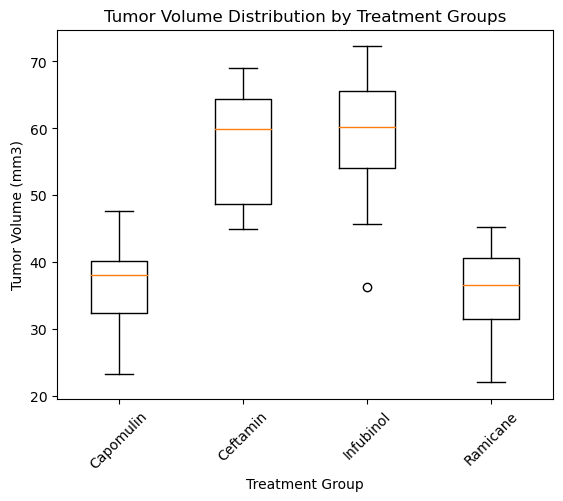

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# drug_desired = ['Infubinol','Capomulin','Ramicane','Ceftamin']
# list_of_desired_drug = []
# for drug in drug_desired:
#     new_sub = maximum_timepoint_merged[maximum_timepoint_merged['Drug Regimen']==drug]
#     list_of_desired_drug.append(new_sub)
# list_of_desired_drug

#Filter the DataFrame for the desired drug regimens
selected_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = maximum_timepoint_merged[maximum_timepoint_merged['Drug Regimen'].isin(selected_drugs)]

#Group the data by 'Drug Regimen' and select 'Tumor Volume (mm3)'
grouped = filtered_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

#Convert the grouped data to a list of Series
data = [group for name, group in grouped]

#Create a box plot
plt.boxplot(data, labels=grouped.groups.keys())
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Distribution by Treatment Groups')
plt.xticks(rotation=45)




## Line and Scatter Plots

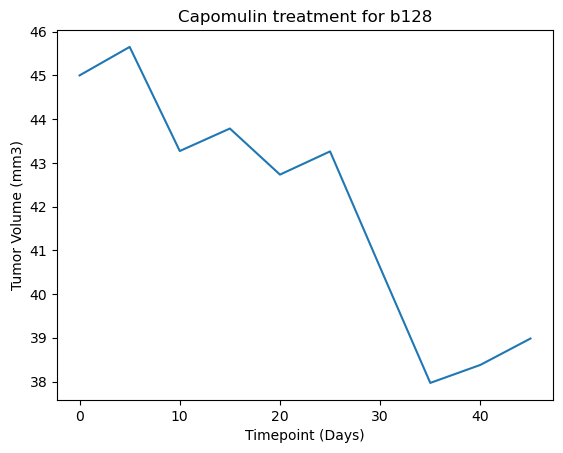

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Single mouse
single_mouse = no_dupes_merged[no_dupes_merged['Mouse ID'] == 'b128']
x_axis = single_mouse['Timepoint']
y_axis = single_mouse['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.title('Capomulin treatment for b128')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

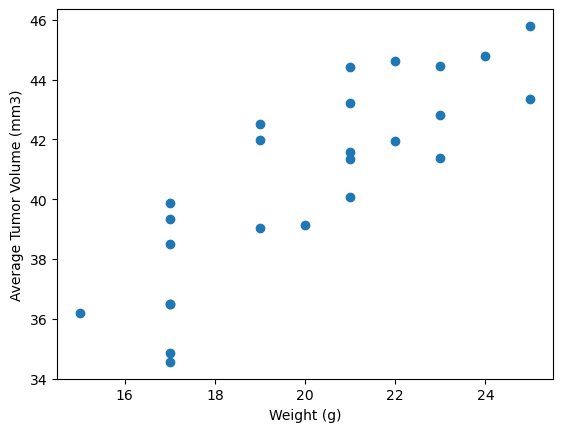

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = no_dupes_merged[no_dupes_merged['Drug Regimen']=='Capomulin']

avg_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

avg_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
avg_weight

plt.scatter(avg_weight, avg_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
# capomulin_weight = maximum_timepoint_merged[maximum_timepoint_merged['Drug Regimen']=='Capomulin']
# capomulin_weight


## Correlation and Regression

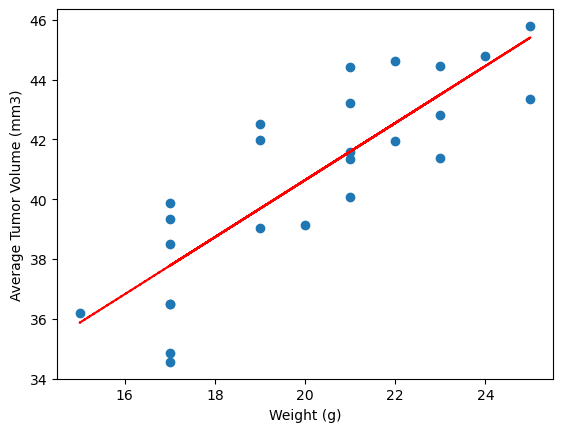

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

avg_vol_slope, avg_vol_intercept, avg_vol_r, avg_vol_p, avg_vol_std_err = linregress(avg_weight, avg_vol)

avg_fit = avg_vol_slope * avg_weight + avg_vol_intercept

plt.scatter(avg_weight, avg_vol)
plt.plot(avg_weight,avg_fit,'--',color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()